In [198]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from helpers.facedetection import extractFaces
from helpers.CK48Dataprocessing import loadDataset, TrainTestSplit
from helpers.UTKFaceDataprocessing import UTKFaceProcessing, UTKFaceTrainTestSplit

In [202]:
fldr = "./UTKFace"
images, labels, ages, genders, images_o = UTKFaceProcessing(fldr)
X_train, X_test, Y_train, Y_test= UTKFaceTrainTestSplit(images, labels, testSize=0.25)
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

Importing labels: 100%|███████████████████████████████████| 23708/23708 [00:00<00:00, 189465.60it/s]


In [203]:
path = './CK+48'
images_f_2_EM, images_f_EM, labels_f_EM, images_EM, images_o_EM, labels_EM, Exp_EM = loadDataset(path)
X_train_EM, X_test_EM, Y_train_EM, Y_test_EM= TrainTestSplit(labels_f_EM, labels_f_EM, testSize=0.25)

Importing from surprise: 100%|████████████████████████████████████| 249/249 [00:02<00:00, 89.96it/s]


In [204]:
Model_EM = tf.keras.models.load_model('./saved/Emotion_detection.h5')
print(Model_EM.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0     

In [205]:
Model_AG = tf.keras.models.load_model('./saved/Age_sex_detection_UTKFace23k.h5')
print(Model_AG.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [222]:
def testown(img, scaleFactor=1.1, minNeighbours=5):
    
    # extract faces
    faces = extractFaces(img, scaleFactor=scaleFactor, minNeighbours=minNeighbours)
    
    if faces.shape[0] == 0:
        print("No face found in image.")
    
    for face in faces:
    
        img1 = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        img2 = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
        plt.imshow(img1)
        plt.show()
        plt.clf()
        
        img1= cv2.resize(img1,(48,48))
        img2= cv2.resize(img2,(48,48))
        
        img1=img1/255
        img2=img2/255
        
        pred1=Model1.predict(np.array([img2]))
        pred2=Model2.predict(np.array([img1]))
        
        sex_f=['Male','Female']
        Exp=['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
        
        age=int(np.round(pred2[1][0]))
        sex=int(np.round(pred2[0][0]))
        
        print("Predicted Age: "+ str(age))
        print("Predicted Sex: "+ sex_f[sex])
        pred_class1=Exp[int(np.argmax(pred1))]
        print("Predicted Emotion: "+ pred_class1)
        
        

    # Without face detection
    img = cv2.imread(img)
    
    
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
    
    plt.imshow(img1)
    plt.show()
    plt.clf()

    img1= cv2.resize(img1,(48,48))
    img2= cv2.resize(img2,(48,48))

    img1=img1/255
    img2=img2/255

    pred1=Model1.predict(np.array([img2]))
    pred2=Model2.predict(np.array([img1]))

    sex_f=['Male','Female']
    Exp=['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

    age=int(np.round(pred2[1][0]))
    sex=int(np.round(pred2[0][0]))
    
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ sex_f[sex])
    pred_class1=Exp[int(np.argmax(pred1))]
    print("Predicted Emotion: "+ pred_class1)
    

C:\Users\cpang\D7041E_mini_project\helpers\facedetection.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  faces_return = np.array(faces_list)


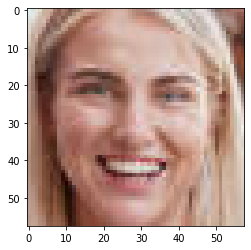

Predicted Age: 20
Predicted Sex: Female
Predicted Emotion: happy


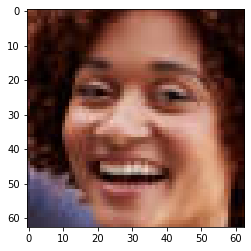

Predicted Age: 19
Predicted Sex: Female
Predicted Emotion: disgust


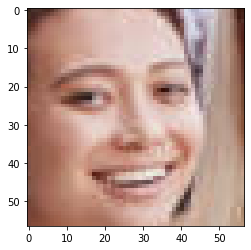

Predicted Age: 21
Predicted Sex: Female
Predicted Emotion: fear


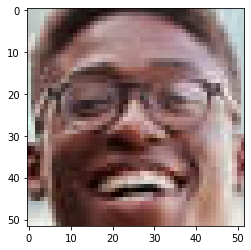

Predicted Age: 41
Predicted Sex: Female
Predicted Emotion: fear


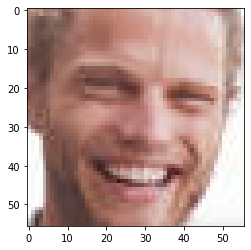

Predicted Age: 28
Predicted Sex: Male
Predicted Emotion: fear


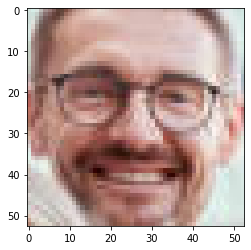

Predicted Age: 40
Predicted Sex: Male
Predicted Emotion: happy


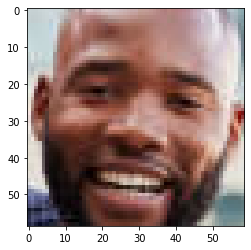

Predicted Age: 32
Predicted Sex: Male
Predicted Emotion: disgust


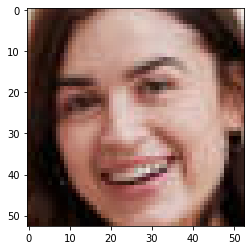

Predicted Age: 24
Predicted Sex: Female
Predicted Emotion: fear


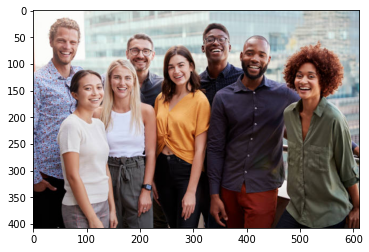

Predicted Age: 56
Predicted Sex: Female
Predicted Emotion: anger


<Figure size 432x288 with 0 Axes>

In [253]:
img = './images/test.jpg'
testown(img, scaleFactor=1.2, minNeighbours=5)